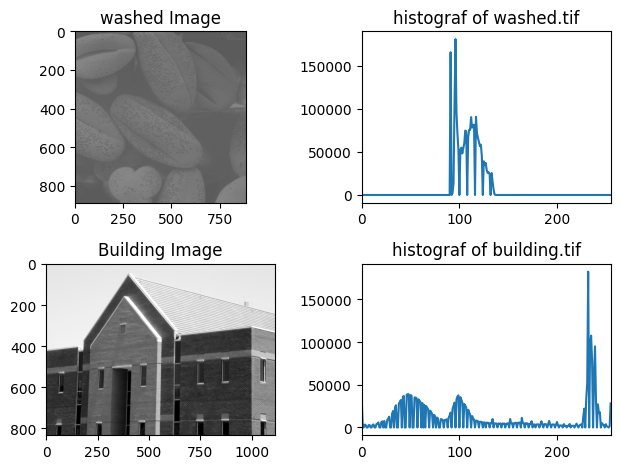

In [29]:
#### Question1

import cv2
import matplotlib.pyplot as plt
import numpy as np

washedImagePath = "washedPolen.tif"
washedImg = cv2.imread(washedImagePath)

buildingImgPath =  "building.tif"
buildingImg = cv2.imread(buildingImgPath)

plt.subplot(2,2,1)
plt.imshow(washedImg)
plt.title('washed Image')

plt.subplot(2,2,2)
hist,bin = np.histogram(washedImg.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histograf of washed.tif')

plt.subplot(2,2,3)
plt.imshow(buildingImg)
plt.title('Building Image')

plt.subplot(2,2,4)
hist,bin = np.histogram(buildingImg.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histograf of building.tif')

plt.tight_layout()

In [ ]:
Washed görüntüsünde histogram değerlerini yazdırdığımızda 0 değerine sahip piksellerin sayısı 2625
çıkmaktadır ancak beyaz pikseller o kadar fazla ki grafikte siyah değerler hiç yokmuş gibi gözükmektedir.
Histograma bakılarak beyaz yoğunluklu bir resim olduğu anlaşılmaktadır.

Building görüntüsü ise biraz daha dengeli olsa da resmin üst kısmındaki değerlerden dolayı beyaz piksellerin 
değeri fazla çıkmaktadır.

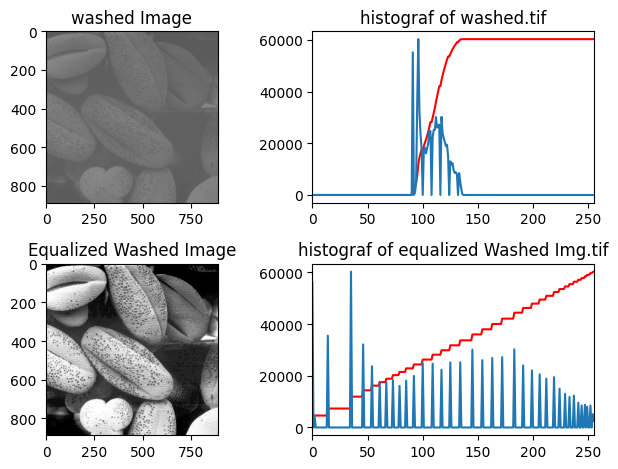

In [3]:
#### Question 2.a)

import cv2
import matplotlib.pyplot as plt
import numpy as np

washedImagePath = "washedPolen.tif"
washedImg = cv2.imread(washedImagePath,0)
equalizedWashedImg = cv2.equalizeHist(washedImg)




buildingImgPath =  "building.tif"
buildingImg = cv2.imread(buildingImgPath)

plt.subplot(2,2,1)
plt.imshow(washedImg, cmap='gray', vmin = 0, vmax = 255) 
# ref: https://stackoverflow.com/questions/51303361/color-rgb2gray-gives-none-grayscale-image-might-be-an-issue-with-jupyter-notebo
plt.title('washed Image')

plt.subplot(2,2,2)
hist,bin = np.histogram(washedImg.ravel(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'r')

plt.xlim([0,255])
plt.plot(hist)
plt.title('histograf of washed.tif')

plt.subplot(2,2,3)
plt.imshow(equalizedWashedImg, cmap='gray', vmin = 0, vmax = 255)
plt.title('Equalized Washed Image')

plt.subplot(2,2,4)
hist,bin = np.histogram(equalizedWashedImg.ravel(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'r')
plt.xlim([0,255])
plt.plot(hist)
plt.title('histograf of equalized Washed Img.tif')

plt.tight_layout()

In [ ]:
Histogram equalizationdan sonra orta değerlerdeki piksel yoğunluğu ortalamaya dağıldı ve kontrast artarak resmin
detaylarını ortaya çıkardı. Bu yöntem renk dağılımı bir yere yığılmış resimlerde kullanılması uygun bir yöntem olduğu için 
güzel bir çıktı sağladı.

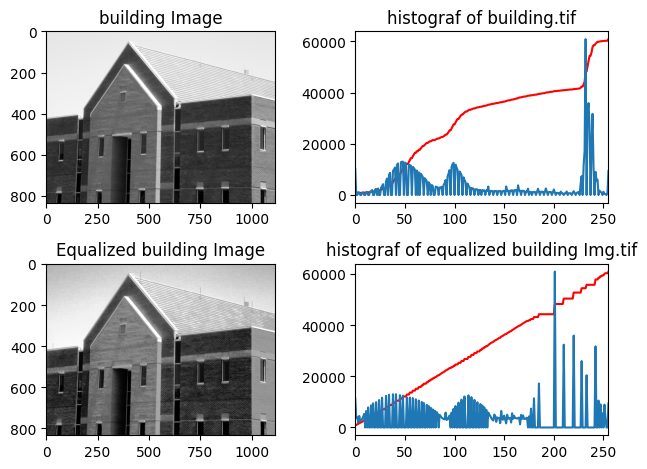

In [4]:
#### Question 2.b)

import cv2
import matplotlib.pyplot as plt
import numpy as np

buildingImgPath =  "building.tif"
buildingImg = cv2.imread(buildingImgPath, 0)
equalizedBuildingImg = cv2.equalizeHist(buildingImg)

plt.subplot(2,2,1)
plt.imshow(buildingImg, cmap='gray', vmin = 0, vmax = 255) 
# ref: https://stackoverflow.com/questions/51303361/color-rgb2gray-gives-none-grayscale-image-might-be-an-issue-with-jupyter-notebo
plt.title('building Image')

plt.subplot(2,2,2)
hist,bin = np.histogram(buildingImg.ravel(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'r')

plt.xlim([0,255])
plt.plot(hist)
plt.title('histograf of building.tif')

plt.subplot(2,2,3)
plt.imshow(equalizedBuildingImg, cmap='gray', vmin = 0, vmax = 255)
plt.title('Equalized building Image')

plt.subplot(2,2,4)
hist,bin = np.histogram(equalizedBuildingImg.ravel(),256,[0,255])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'r')

plt.xlim([0,255])
plt.plot(hist)
plt.title('histograf of equalized building Img.tif')

plt.tight_layout()

In [ ]:
Bu resimde ise yukarıdaki resimdeki gibi belirgin bir yığılma olmadığı için fark çok anlaşılmadı ancak 200 değerinin
üstündeki beyaz pikseller için olan yığılmayı 175 değerinden itibaren dağıtarak bir düzeltme sağladı.

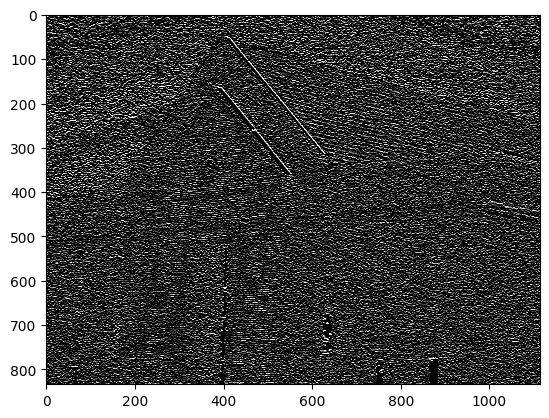

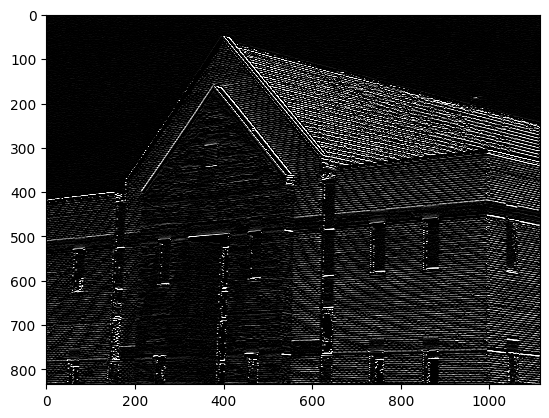

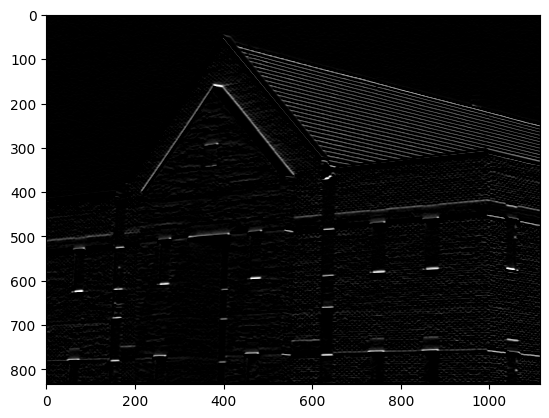

In [10]:
#### Question 3)

import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

def LoG (x, y, sigma) :
    sigmaSq = sigma**2
    return (-1/(np.pi * sigmaSq**2)) * (1-((x**2+y**2)/(2*sigmaSq))) * np.exp(-(x**2+y**2)/(2*sigmaSq))


def generateKernel( size , sigma ):
    mask = np.zeros(shape = (size,size))
    halfsize = (size - 1)// 2 ;    
    for  x in range(- halfsize, halfsize + 1):
        for y in range(- halfsize, halfsize + 1):
            mask[x + halfsize][ y + halfsize] = LoG(x, y, sigma) 
            
    return mask

def normalizeKernel(tMask) :
    normalizedCoeff = 1 / np.sum(tMask)
    for  x in range(0, tMask[0].size):
        for y in range(0,tMask[1].size):
            tMask[x][y] = tMask[x][y] * normalizedCoeff
    
    return tMask


if __name__ == "__main__":
    
    kernelSize = 5
    
    sigma1 = 0.6
    sigma2 = 1.2
    sigma3 = 2.5
    
    houseImagePath =  "building.tif"
    houseImage = cv2.imread(houseImagePath,0)
    
    mask1 = generateKernel( kernelSize, sigma1 )
    normalizedMask1 = normalizeKernel(mask1)
    filteredImg1 = ndimage.convolve(houseImage, normalizedMask1, mode='constant', cval=0.0)
    sobelmg1 = cv2.Sobel(filteredImg1, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    
    mask2 = generateKernel( kernelSize, sigma2 )
    normalizedMask2 = normalizeKernel(mask2)
    filteredImg2 = ndimage.convolve(houseImage, normalizedMask2, mode='constant', cval=0.0)
    sobelmg2 = cv2.Sobel(filteredImg2, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    
    mask3 = generateKernel( kernelSize, sigma3 )
    normalizedMask3 = normalizeKernel(mask3)
    filteredImg3 = ndimage.convolve(houseImage, normalizedMask3, mode='constant', cval=0.0)
    sobelmg3 = cv2.Sobel(filteredImg3, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)


    #plt.subplot(1,3,1)
    plt.imshow(sobelmg1, cmap='gray', vmin = 0, vmax = 255) 
    plt.show()
    #plt.subplot(1,3,2)
    plt.imshow(sobelmg2, cmap='gray', vmin = 0, vmax = 255) 
    plt.show()
    
    #plt.subplot(1,3,3)
    plt.imshow(sobelmg3, cmap='gray', vmin = 0, vmax = 255) 
    plt.show()
    


In [ ]:
Resimlerin testi için 5x5 boyutunda bir maske kullanılmıştır. Maske boyutu sabit tutularak sigma değeri değişmiştir.
Laplace filtresi gürültüye çok müsait olduğu için önce smoothing algoritmaları ile resimdeki keskinlik azaltılır. Buradaki
örneklerde ise sigma değeri giderek arttırılarak çıktı elde edilmiştir. Sigma değeri arttıkça filtre daha yayılımsal olmuş
(meksika şapkasındaki sivrilik azaltılmıştır gibi düşünülebilir) ve yumuşatma etkisi artmıştır. Buna bağlı olarak resim 
değerleri birbirine yaklaştığı için kenar bulma algoritmalarında belirgin kenarlar kalmıştır. Bunun yanında sigma değeri 
büyüdükçe meksika şapkasının tepe noktası azalacağı için maske(kernel) boyutunu buna bağlı olarak büyütmek filtrenin performansını
iyileştirecektir.


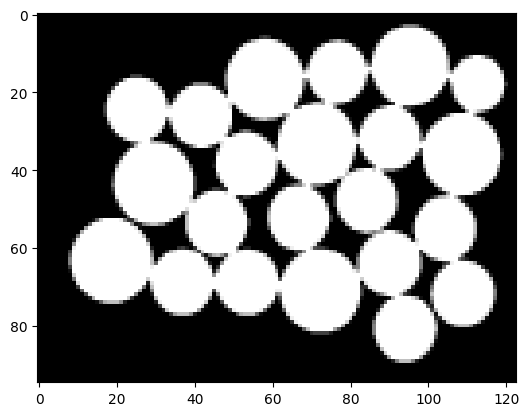

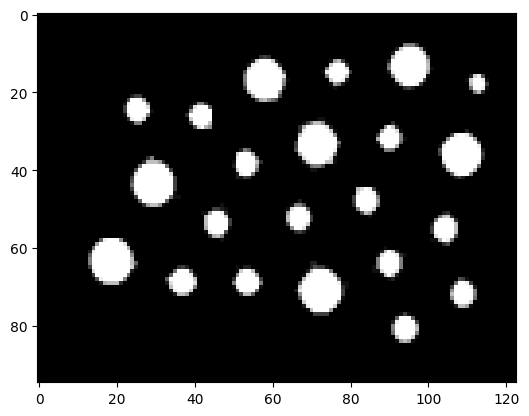

In [28]:
#### Question 5) 

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage

coinsImgPath =  "coins.pgm"
coinImg = cv2.imread(coinsImgPath,0)

kernel = np.uint8(skimage.morphology.disk(5))

img_erosion = cv2.erode(coinImg, kernel)


plt.imshow(coinImg , cmap='gray', vmin = 0, vmax = 255)
plt.show()

plt.imshow(img_erosion , cmap='gray', vmin = 0, vmax = 255) 
plt.show()


